In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('one_day_one_night.xlsx')

In [3]:
activities = df['device/activity'].unique()
activities

array([1, 'running', 'fast walking', 'light activity???', 'slow walking',
       'light activity', 'light sleep', 'deep sleep'], dtype=object)

In [4]:
df.columns

Index(['device/activity', 'timestamp', 'steps', 'hr', 'Raw intensity',
       'Raw kind', 'Kind to binary'],
      dtype='object')

In [5]:
act_kind_df = df[['device/activity', 'Raw kind']]

In [6]:
act_kind_df.groupby('device/activity')['Raw kind'].unique()

device/activity
1                    [80, 96, 16, 1, 33, 17, 90, 92, 112, 121, 122]
deep sleep                                                    [112]
fast walking                [17, 33, 1, 96, 16, 49, 65, 66, 50, 81]
light activity                                  [96, 16, 17, 80, 1]
light activity???                                   [1, 96, 16, 80]
light sleep                    [80, 90, 89, 121, 112, 122, 16, 123]
running                                                [82, 98, 50]
slow walking                                    [17, 1, 82, 66, 16]
Name: Raw kind, dtype: object

In [7]:
act_intens_df = df[['device/activity', 'Raw intensity']]

In [8]:
df.groupby('device/activity')['Raw intensity'].unique()

device/activity
1                    [15, 6, 21, 24, 9, 10, 7, 11, 22, 16, 19, 18, ...
deep sleep                                                      [0, 1]
fast walking         [132, 145, 141, 143, 158, 160, 151, 152, 148, ...
light activity       [60, 22, 47, 87, 25, 11, 13, 75, 74, 61, 46, 3...
light activity???    [109, 72, 51, 36, 76, 143, 134, 108, 67, 45, 1...
light sleep          [0, 24, 20, 17, 21, 22, 25, 5, 26, 14, 2, 40, ...
running                                                [255, 253, 233]
slow walking         [87, 90, 97, 120, 85, 100, 187, 196, 202, 135,...
Name: Raw intensity, dtype: object

<AxesSubplot:>

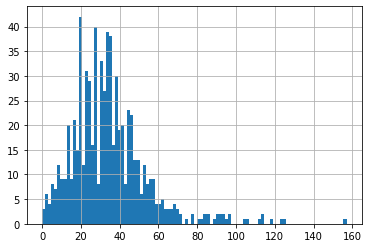

In [10]:
df.loc[df['device/activity']==1]['Raw intensity'].hist(bins=100)

<AxesSubplot:>

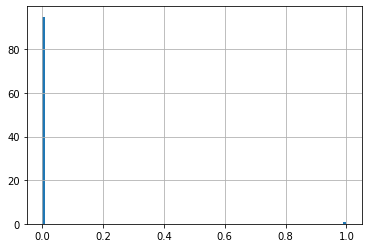

In [11]:
df.loc[df['device/activity']=='deep sleep']['Raw intensity'].hist(bins=100)

<AxesSubplot:>

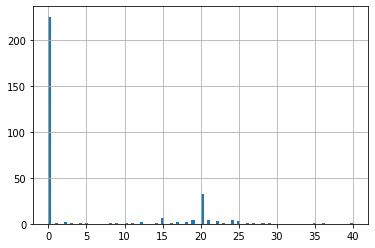

In [12]:
df.loc[df['device/activity']=='light sleep']['Raw intensity'].hist(bins=100)

<AxesSubplot:>

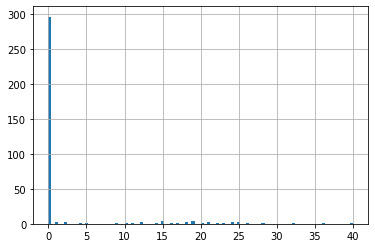

In [13]:
df.loc[df['Raw kind'] == 112]['Raw intensity'].hist(bins=100)

In [14]:
df.loc[df['Raw kind'] == 122]['Raw intensity'].hist(bins=100)

<AxesSubplot:>

<AxesSubplot:>

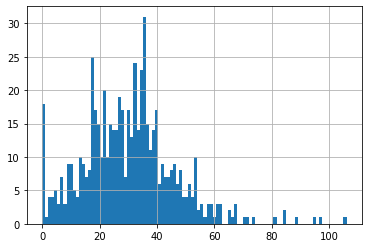

In [15]:
df.loc[df['Raw kind'] == 80]['Raw intensity'].hist(bins=100)

<AxesSubplot:>

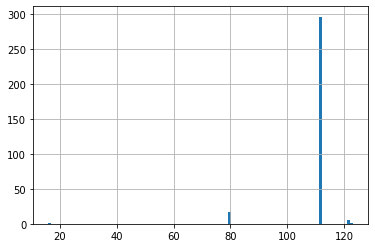

In [16]:
df.loc[df['Raw intensity'] == 0]['Raw kind'].hist(bins=100)

<AxesSubplot:>

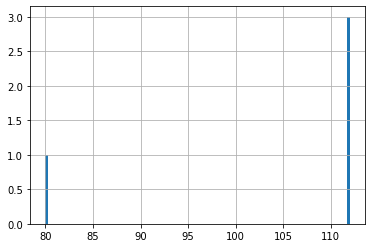

In [17]:
df.loc[df['Raw intensity'] == 1]['Raw kind'].hist(bins=100)

<AxesSubplot:>

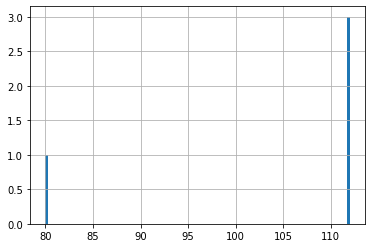

In [18]:
df.loc[df['Raw intensity'] == 2]['Raw kind'].hist(bins=100)

In [23]:
sorted(df['Raw kind'].unique())

[1,
 16,
 17,
 33,
 49,
 50,
 65,
 66,
 80,
 81,
 82,
 89,
 90,
 92,
 96,
 98,
 112,
 121,
 122,
 123]

In [24]:
pd.crosstab(df['device/activity'], df['Raw kind'])

Raw kind           1    16   17   33   49   50   65   66   80   81   82   89   \
device/activity                                                                 
1                   27   21    2    1    0    0    0    0  564    0    0    0   
deep sleep           0    0    0    0    0    0    0    0    0    0    0    0   
fast walking        30    2   15    9    4    2    7    3    0    1    0    0   
light activity       3    5    1    0    0    0    0    0    5    0    0    0   
light activity???    7    1    0    0    0    0    0    0    3    0    0    0   
light sleep          0    1    0    0    0    0    0    0   19    0    0    2   
running              0    0    0    0    0    1    0    0    0    0    3    0   
slow walking        16    1    5    0    0    0    0    2    0    0    1    0   

Raw kind           90   92   96   98   112  121  122  123  
device/activity                                            
1                    4    1   76    0    4    1    4    0  
deep sleep           0    0    0    0   96    0    0    0  
fast walking         0    0    1    0    0    0    0    0  
light activity       0    0   13    0    0    0    0    0  
light activity???    0    0    4    0    0    0    0    0  
light sleep          6    0    0    0  237   16   25    1  
running              0    0    0    5    0    0    0    0  
slow walking         0    0    0    0    0    0    0    0

In [27]:
pd.crosstab(df['Raw intensity'], df['Raw kind'])

Raw kind       1    16   17   33   49   50   65   66   80   81   82   89   \
Raw intensity                                                               
0                0    1    0    0    0    0    0    0   17    0    0    0   
1                0    0    0    0    0    0    0    0    1    0    0    0   
2                0    0    0    0    0    0    0    0    1    0    0    0   
3                0    0    0    0    0    0    0    0    4    0    0    0   
4                0    0    0    0    0    0    0    0    4    0    0    0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
196              0    0    0    0    0    0    0    1    0    0    0    0   
202              0    0    0    0    0    0    0    1    0    0    0    0   
233              0    0    0    0    0    1    0    0    0    0    0    0   
253              0    0    0    0    0    0    0    0    0    0    1    0   
255              0    0    0    0    0    0    0    0    0    0    2    0   

Raw kind       90   92   96   98   112  121  122  123  
Raw intensity                                          
0                0    0    0    0  296    6    0    1  
1                0    0    0    0    3    0    0    0  
2                0    0    0    0    3    0    0    0  
3                0    0    0    0    0    1    0    0  
4                0    0    0    0    1    0    0    0  
...            ...  ...  ...  ...  ...  ...  ...  ...  
196              0    0    0    0    0    0    0    0  
202              0    0    0    0    0    0    0    0  
233              0    0    0    0    0    0    0    0  
253              0    0    0    0    0    0    0    0  
255              0    0    0    5    0    0    0    0  

[150 rows x 20 columns]

     |████████████████████████████████| 9.4 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 1.5 MB/s eta 0:00:01
  Using cached scipy-1.5.2-cp38-cp38-manylinux1_x86_64.whl (25.7 MB)
Note: you may need to restart the kernel to use updated packages.
